# **Quiz 1** 

Alpha Airlines ha encargado una nueva flota de DC- 717. En esta fase del contrato, el director de operaciones de Alpha debe especificar la configuración de asientos del avión que se utilizará en el circuito Boston-Atlanta-Chicago-Boston. Alpha vuela en esta ruta una vez al día. 

La decisión de configuración implica especificar cuántas filas se asignarán a la primera clase y cuántas a la clase turista. Si el avión estuviera configurado en su totalidad con filas de turista (que contienen seis asientos cada una), habría cuarenta filas. Los asientos de primera clase son más anchos y ofrecen más espacio para las piernas, por lo que, para hacer sitio a una fila de primera clase (que contiene cuatro asientos), hay que eliminar dos filas de turista. Por lo tanto, la conversión de asientos de turista a primera clase implica la pérdida de algunos asientos, pero la conversión puede ser atractiva porque los ingresos son mayores para los pasajeros de primera clase que para los de turista (véase el Cuadro 1).

**CUADRO 1** Ingresos por Asiento

|                  | Primera Clase | Clase Turista |
|------------------|---------------|---------------|
| Bostón - Atlanta | $ 400          | $ 175         |
| Atlanta - Chicago| $ 400          | $ 150         |
| Chicago - Bostón | $ 450          | $ 200         |

Rara vez es posible una coincidencia perfecta entre la configuración y la demanda de asientos. Los datos históricos sugieren una distribución probabilística de la demanda de asientos en cada tramo (como se detalla en el Cuadro 2). 

**CUADRO 2** Distribución de la Demanda Total de Asientos

|                  | mínimo | más probable | máximo |
|------------------|--------|--------------|-------|
| Bostón - Atlanta | 160    | 180          | 220   |
| Chicago - Bostón | 150    | 200          | 225   |

Para el tramo Atlanta - Chicago se tienen los siguientes datos históricos de la demanda de asientos (aunque la experiencia ha mostrado que la demanda mínima es de 140 asientos y la demanda máxima es de 240 asientos para este tramo): 

173 212 225 199 205 176 215 198 198 184 

199 211 233 195 217 209 177 161 175 209 

197 206 167 196 205 219 184 172 207 191 

164 216 163 236 183 213 195 182 238 141 

178 211 165 213 186 202 186 194 210 206 

196 197 236 173 199 211 168 181 206 216 

196 201 180 209 176 221 190 206 190 210 

Existe otra distribución para la fracción de la demanda que corresponde a los asientos de primera clase (Cuadro 3), que parece aplicarse en todos los tramos, aunque la fracción que se produce en un mercado en cualquier día es independiente de la fracción en los demás mercados. Por último, hay alguna posibilidad de que todos los asientos de cualquiera de las categorías de asientos se reserven en un tramo determinado cuando se produzca la demanda de esa categoría. Con las actuales políticas de gestión, esa demanda se pierde sencillamente en favor de los competidores. 

El costo fijo de operar el circuito completo es de 100.000 dólares por día. Alpha Airlines busca una configuración que maximice los beneficios. 

## Librerias

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import scipy.stats as stats
from scipy.stats import rv_discrete, rv_histogram, binom, norm, kstest
from statsmodels.distributions.empirical_distribution import ECDF

Demanda de asientos de Atlanta-Chicago

In [208]:
demand_atlanta_chicago = [
    173, 212, 225, 199, 205, 176, 215, 198, 198, 184,
    199, 211, 233, 195, 217, 209, 177, 161, 175, 209,
    197, 206, 167, 196, 205, 219, 184, 172, 207, 191,
    164, 216, 163, 236, 183, 213, 195, 182, 238, 141,
    178, 211, 165, 213, 186, 202, 186, 194, 210, 206,
    196, 197, 236, 173, 199, 211, 168, 181, 206, 216,
    196, 201, 180, 209, 176, 221, 190, 206, 190, 210
]

In [209]:
params = stats.norm.fit(demand_atlanta_chicago)
mean_demand_atlanta_chicago = params[0] 
std_demand_atlanta_chicago = params[1]

print("Media: " ,mean_demand_atlanta_chicago)
print("Desviacion Estandar MLE: ", std_demand_atlanta_chicago)
print(*params)

Media:  196.55714285714285
Desviacion Estandar MLE:  19.65534148722916
196.55714285714285 19.65534148722916


# Prueba de bondad de ajuste

Prueba Kolmogorov-Smirnov
(np.float64(196.55714285714285), np.float64(19.65534148722916))
Estadistico K-S:  0.08271358774189719
Valor p:  0.6931728208183756
No rechazamos H0


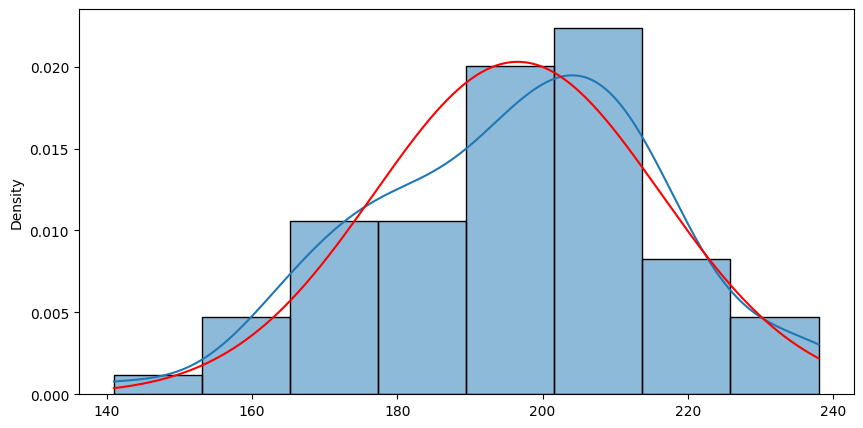

In [210]:
print("Prueba Kolmogorov-Smirnov")
ks_stat_norm, p_value_norm = stats.kstest(demand_atlanta_chicago, stats.norm.cdf, args=params)
print(params)
print("Estadistico K-S: ",ks_stat_norm)
print("Valor p: ",p_value_norm)

if p_value_norm < 0.05:
    print("Rechazamos H0")
else:
    print("No rechazamos H0")

# visualizamos la distribucion de los datos
plt.figure(figsize=(10, 5))
sns.histplot(demand_atlanta_chicago, kde=True, stat='density')
x = np.linspace(min(demand_atlanta_chicago), max(demand_atlanta_chicago), 1000)
y = stats.norm.pdf(x, *params)
plt.plot(x, y, 'r')
plt.show()


Min:  141
Max:  238
Mode:  ModeResult(mode=np.int64(206), count=np.int64(4))
Moda: 206
Prueba Kolmogorov-Smirnov (Distribución Triangular)
Parámetros ajustados: Mínimo = 141, Moda = ModeResult(mode=np.int64(206), count=np.int64(4)), Máximo = 238
Parámetro c (posición del pico): 0.6701030927835051
Estadístico K-S: 0.07677580151806962
Valor p: 0.7748036359678945
No rechazamos H0


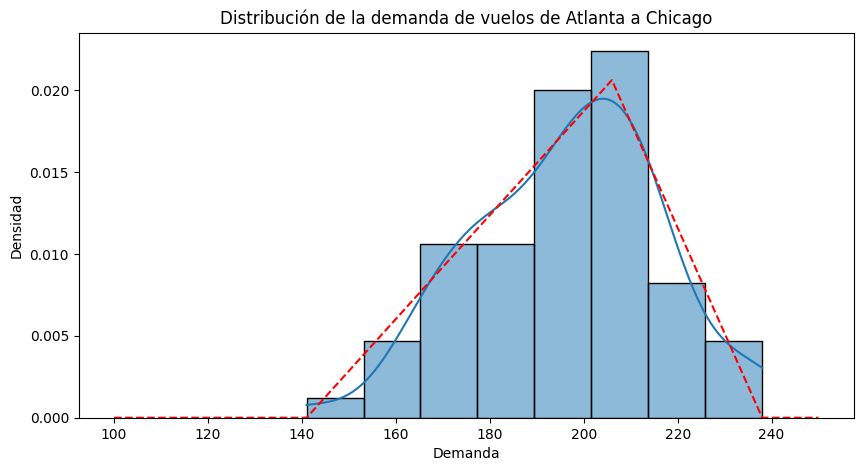

In [211]:
min_val = min(demand_atlanta_chicago)
max_val = max(demand_atlanta_chicago)
mode_val = stats.mode(demand_atlanta_chicago)

print("Min: ", min_val)
print("Max: ", max_val) 
print("Mode: ", mode_val)
moda = 206
print("Moda:",moda)
# calcular la c para la distribucion triangular
c = ( moda - min_val) / (max_val - min_val)

# Prueba Kolmogorov-Smirnov para la distribución triangular
ks_stat_tri, p_value_tri = stats.kstest(demand_atlanta_chicago, stats.triang.cdf, args=(c, min_val, max_val - min_val))
# Mostrar resultados
print("Prueba Kolmogorov-Smirnov (Distribución Triangular)")
print(f"Parámetros ajustados: Mínimo = {min_val}, Moda = {mode_val}, Máximo = {max_val}")
print(f"Parámetro c (posición del pico): {c}")
print(f"Estadístico K-S: {ks_stat_tri}")
print(f"Valor p: {p_value_tri}")

if p_value_tri < 0.05:
    print("Rechazamos H0")
else:
    print("No rechazamos H0")

# visualizacion de la distribucion
plt.figure(figsize=(10, 5))
sns.histplot(demand_atlanta_chicago, kde=True, stat='density')
x = np.linspace(100, 250, 1000)
y = stats.triang.pdf(x, c, min_val, max_val - min_val)
plt.plot(x, y, 'r--')
plt.title('Distribución de la demanda de vuelos de Atlanta a Chicago')
plt.xlabel('Demanda')
plt.ylabel('Densidad')
plt.show()


Tabla comparativa 

**KS Stat vs P Value Norm/Triangular**

In [212]:
data = {
    "Distribución": ["Normal", "Triangular"],
    "Estadístico KS": [ks_stat_norm, ks_stat_tri],
    "Valor p": [p_value_norm, p_value_tri]
}

# Crear el DataFrame
df_comparacion = pd.DataFrame(data)

# Mostrar la tabla
print(df_comparacion)

  Distribución  Estadístico KS   Valor p
0       Normal        0.082714  0.693173
1   Triangular        0.076776  0.774804


## Conclusion
Como el estadistico KS del ajuste de la distribucion triangular es menor que el de la normal y su valor p es mayor entonces es correcto escoger la distribucion triangular por encima de la normal para la demanda de asientos del tramo Atlanta-Chicago

# 1. Variables conocidas

In [213]:
# Variables conocidas

# Variables conocidas
# Configuración de asientos
total_rows = 40  # Total de filas si todas son de turista
seats_per_first_class_row = 4  # Asientos por fila de primera clase
seats_per_tourist_row = 6  # Asientos por fila de turista

# Ingresos por asiento (por tramo)
revenue_first_class = [400, 400, 450]  # Boston-Atlanta, Atlanta-Chicago, Chicago-Boston
revenue_tourist = [175, 150, 200]  # Boston-Atlanta, Atlanta-Chicago, Chicago-Boston

# Costo fijo diario
fixed_cost = 100000  # Costo fijo por operar el circuito completo

# Parámetros de la distribución triangular (demanda por tramo)
boston_atlanta_min = 160  # Mínimo para Boston-Atlanta
boston_atlanta_mode = 180  # Moda para Boston-Atlanta
boston_atlanta_max = 220  # Máximo para Boston-Atlanta

chicago_boston_min = 150  # Mínimo para Chicago-Boston
chicago_boston_mode = 200  # Moda para Chicago-Boston
chicago_boston_max = 225  # Máximo para Chicago-Boston

# Parámetros de la distribución normal (demanda para Atlanta-Chicago)
atlanta_chicago_min = 140  # Mínimo para Atlanta-Chicago
atlanta_chicago_mode = 206  # Moda para Atlanta-Chicago
atlanta_chicago_max = 240  # Máximo para Atlanta-Chicago
# Fracción de primera clase (distribución discreta)
fraction_first_class_options = [0.05, 0.12, 0.15]  # Posibles fracciones de primera clase
fraction_first_class_probabilities = [0.2, 0.5, 0.3]  # Probabilidades asociadas

num_simulations = 20000 # Número de simulaciones a realizar

# 2. Variables de decision

In [214]:
# Variables de decisión
first_class_rows = 3  # Número de filas de primera clase
tourist_rows = 34  # Número de filas de turista

# Calcular el número de asientos
first_class_seats = first_class_rows * seats_per_first_class_row
tourist_seats = tourist_rows * seats_per_tourist_row
total_seats = first_class_seats + tourist_seats

# 3. Entradas inciertas

In [215]:
# Entradas inciertas
def simulate_demand():
    """
    Simula la demanda para los tres tramos:
    - Boston-Atlanta: Distribución triangular
    - Atlanta-Chicago: Distribución normal
    - Chicago-Boston: Distribución triangular
    """
    demand_boston_atlanta = np.random.triangular(boston_atlanta_min, boston_atlanta_mode, boston_atlanta_max)
    #demand_atlanta_chicago = np.random.normal(mean_demand, std_demand)
    demand_atlanta_chicago = np.random.triangular(atlanta_chicago_min, atlanta_chicago_mode, atlanta_chicago_max)
    demand_chicago_boston = np.random.triangular(chicago_boston_min, chicago_boston_mode, chicago_boston_max)
    
    # Asegurarse de que la demanda no sea negativa
    #demand_atlanta_chicago = max(0, demand_atlanta_chicago)
    
    return demand_boston_atlanta, demand_atlanta_chicago, demand_chicago_boston

dist_fraccion_primera = rv_discrete(values=(fraction_first_class_options, fraction_first_class_probabilities))

def simulate_fraction_first_class():
    """
    Simula la fracción de la demanda que corresponde a la primera clase.
    """
    return dist_fraccion_primera.rvs()


# 4. Calculos intermedios

In [216]:
def calculate_profit(first_class_rows, tourist_rows, num_simulations=20000):
    """
    Calcula el beneficio diario para una configuración dada de asientos.
    Devuelve:
    - El beneficio esperado.
    - La lista de beneficios obtenidos en cada simulación.
    """
    # Calcular el número de asientos
    first_class_seats = first_class_rows * seats_per_first_class_row
    tourist_seats = tourist_rows * seats_per_tourist_row
    
    # Lista para almacenar los beneficios de cada simulación
    profits = []
    
    for _ in range(num_simulations):
        # Simular la demanda y la fracción de primera clase
        demand_boston_atlanta, demand_atlanta_chicago, demand_chicago_boston = simulate_demand()
        #fraction_first_class = simulate_fraction_first_class()
        
        # Calcular la demanda de primera clase y turista para cada tramo
        #demand_first_class_ba = int(demand_boston_atlanta * fraction_first_class)
        demand_first_class_ba = binom.rvs(math.ceil(demand_boston_atlanta), simulate_fraction_first_class())
        demand_tourist_ba = int(demand_boston_atlanta - demand_first_class_ba)
        
        #demand_first_class_ac = int(demand_atlanta_chicago * simulate_fraction_first_class())
        demand_first_class_ac = binom.rvs(math.ceil(demand_atlanta_chicago), simulate_fraction_first_class())
        demand_tourist_ac = int(demand_atlanta_chicago - demand_first_class_ac)
        
        #demand_first_class_cb = int(demand_chicago_boston * simulate_fraction_first_class())
        demand_first_class_cb = binom.rvs(math.ceil(demand_chicago_boston), simulate_fraction_first_class())
        demand_tourist_cb = int(demand_chicago_boston - demand_first_class_cb)
        
        # Limitar la demanda a la capacidad disponible
        demand_first_class_ba = min(demand_first_class_ba, first_class_seats)
        demand_tourist_ba = min(demand_tourist_ba, tourist_seats)
        
        demand_first_class_ac = min(demand_first_class_ac, first_class_seats)
        demand_tourist_ac = min(demand_tourist_ac, tourist_seats)
        
        demand_first_class_cb = min(demand_first_class_cb, first_class_seats)
        demand_tourist_cb = min(demand_tourist_cb, tourist_seats)
        
        # Calcular los ingresos para cada tramo
        revenue_ba = (demand_first_class_ba * revenue_first_class[0]) + (demand_tourist_ba * revenue_tourist[0])
        revenue_ac = (demand_first_class_ac * revenue_first_class[1]) + (demand_tourist_ac * revenue_tourist[1])
        revenue_cb = (demand_first_class_cb * revenue_first_class[2]) + (demand_tourist_cb * revenue_tourist[2])
        
        # Calcular el beneficio total
        total_revenue = revenue_ba + revenue_ac + revenue_cb
        profit = total_revenue - fixed_cost
        profits.append(profit)
    
    # Calcular el beneficio esperado
    expected_profit = np.mean(profits)
    
    return expected_profit, profits

In [217]:
def calculate_profit_and_equilibrium(first_class_rows, tourist_rows, num_simulations=20000):
    """
    Calcula el beneficio diario, la proporción de días en equilibrio y la lista de beneficios.
    Devuelve:
    - El beneficio esperado.
    - La proporción de días en equilibrio.
    - La lista de beneficios obtenidos en cada simulación.
    """
    # Calcular el número de asientos
    first_class_seats = first_class_rows * seats_per_first_class_row
    tourist_seats = tourist_rows * seats_per_tourist_row
    
    # Lista para almacenar los beneficios de cada simulación
    profits = []
    
    # Contador para días en equilibrio (beneficio >= 0)
    equilibrium_days = 0
    
    for _ in range(num_simulations):
        # Simular la demanda y la fracción de primera clase
        demand_boston_atlanta, demand_atlanta_chicago, demand_chicago_boston = simulate_demand()
        fraction_first_class = simulate_fraction_first_class()
        
        demand_first_class_ba = binom.rvs(math.ceil(demand_boston_atlanta), simulate_fraction_first_class())
        demand_tourist_ba = int(demand_boston_atlanta - demand_first_class_ba)
        
        #demand_first_class_ac = int(demand_atlanta_chicago * simulate_fraction_first_class())
        demand_first_class_ac = binom.rvs(math.ceil(demand_atlanta_chicago), simulate_fraction_first_class())
        demand_tourist_ac = int(demand_atlanta_chicago - demand_first_class_ac)
        
        #demand_first_class_cb = int(demand_chicago_boston * simulate_fraction_first_class())
        demand_first_class_cb = binom.rvs(math.ceil(demand_chicago_boston), simulate_fraction_first_class())
        demand_tourist_cb = int(demand_chicago_boston - demand_first_class_cb)
        
        
        # Limitar la demanda a la capacidad disponible
        demand_first_class_ba = min(demand_first_class_ba, first_class_seats)
        demand_tourist_ba = min(demand_tourist_ba, tourist_seats)
        
        demand_first_class_ac = min(demand_first_class_ac, first_class_seats)
        demand_tourist_ac = min(demand_tourist_ac, tourist_seats)
        
        demand_first_class_cb = min(demand_first_class_cb, first_class_seats)
        demand_tourist_cb = min(demand_tourist_cb, tourist_seats)
        
        # Calcular los ingresos para cada tramo
        revenue_ba = (demand_first_class_ba * revenue_first_class[0]) + (demand_tourist_ba * revenue_tourist[0])
        revenue_ac = (demand_first_class_ac * revenue_first_class[1]) + (demand_tourist_ac * revenue_tourist[1])
        revenue_cb = (demand_first_class_cb * revenue_first_class[2]) + (demand_tourist_cb * revenue_tourist[2])
        
        # Calcular el beneficio total
        total_revenue = revenue_ba + revenue_ac + revenue_cb
        profit = total_revenue - fixed_cost
        profits.append(profit)
        
        # Contar días en equilibrio (beneficio >= 0)
        if profit >= 0:
            equilibrium_days += 1
    
    # Calcular el beneficio esperado
    expected_profit = np.mean(profits)
    
    # Calcular la proporción de días en equilibrio
    equilibrium_proportion = equilibrium_days / num_simulations
    
    return expected_profit, equilibrium_proportion, profits

# 5. Salida c) y d)

Beneficio esperado por día: $2667.36


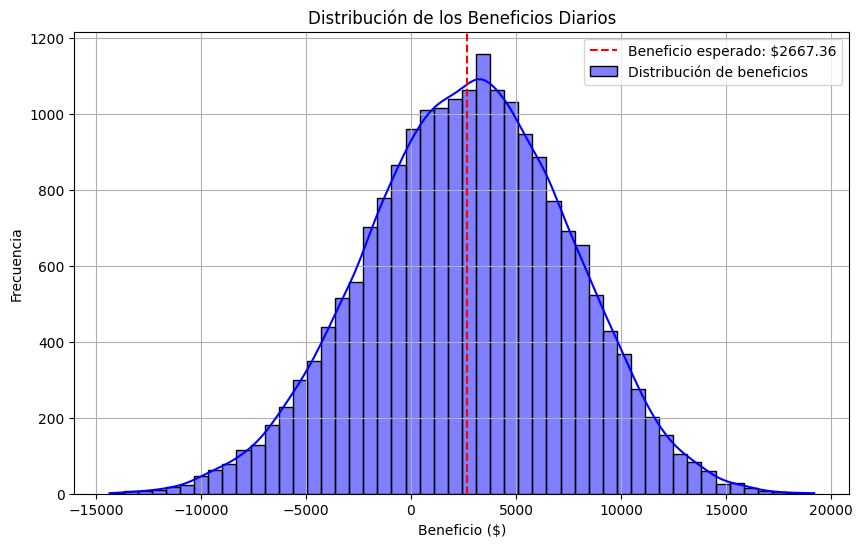

In [218]:

#Calcular el beneficio esperado y la lista de beneficios
expected_profit, profits = calculate_profit(first_class_rows, tourist_rows)

# Mostrar el beneficio esperado
print(f"Beneficio esperado por día: ${expected_profit:.2f}")

# Graficar la distribución de los beneficios
plt.figure(figsize=(10, 6))
sns.histplot(profits, bins=50, kde=True, color="blue", label="Distribución de beneficios")
plt.axvline(expected_profit, color="red", linestyle="--", label=f"Beneficio esperado: ${expected_profit:.2f}")
plt.title("Distribución de los Beneficios Diarios")
plt.xlabel("Beneficio ($)")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.show()

Beneficio esperado por día: $2714.75
Proporción de días en equilibrio (beneficio >= 0): 71.82%


C:\Users\Asus\AppData\Local\Temp\ipykernel_6952\2660300551.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette=colors)


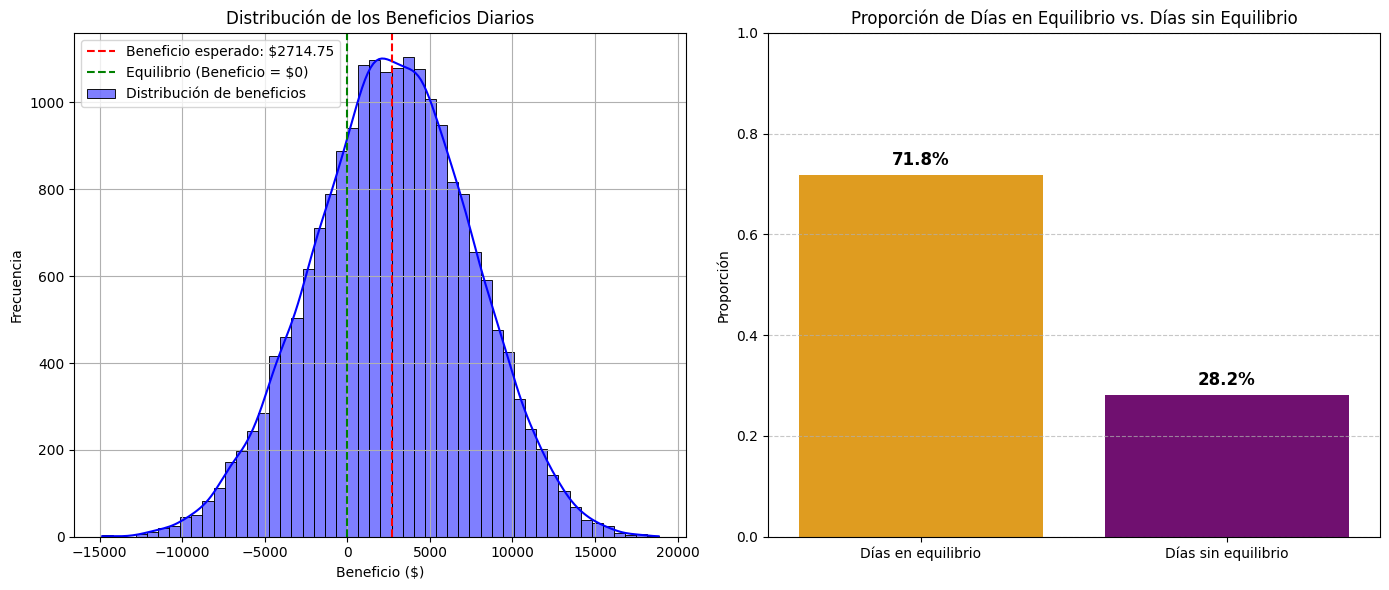

In [219]:

# Calcular el beneficio esperado, la proporción de días en equilibrio y la lista de beneficios
expected_profit, equilibrium_proportion, profits = calculate_profit_and_equilibrium(first_class_rows, tourist_rows)

# Mostrar el beneficio esperado y la proporción de días en equilibrio
print(f"Beneficio esperado por día: ${expected_profit:.2f}")
print(f"Proporción de días en equilibrio (beneficio >= 0): {equilibrium_proportion:.2%}")

# Crear una figura con dos subgráficos
plt.figure(figsize=(14, 6))

# Subgráfico 1: Distribución de los beneficios
plt.subplot(1, 2, 1)
sns.histplot(profits, bins=50, kde=True, color="blue", label="Distribución de beneficios")
plt.axvline(expected_profit, color="red", linestyle="--", label=f"Beneficio esperado: ${expected_profit:.2f}")
plt.axvline(0, color="green", linestyle="--", label="Equilibrio (Beneficio = $0)")
plt.title("Distribución de los Beneficios Diarios")
plt.xlabel("Beneficio ($)")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)

# Subgráfico 2: Proporción de días en equilibrio

labels = ["Días en equilibrio", "Días sin equilibrio"]
values = [equilibrium_proportion, 1 - equilibrium_proportion]
colors = ["orange", "purple"]

plt.subplot(1, 2, 2)
sns.barplot(x=labels, y=values, palette=colors)

for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.1%}", ha='center', fontsize=12, fontweight='bold')

plt.title("Proporción de Días en Equilibrio vs. Días sin Equilibrio")
plt.ylabel("Proporción")
plt.ylim(0, 1)  # Límite del eje y entre 0 y 1 (0% a 100%)
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

# Calculo Intermedio e)

In [220]:
def evaluate_configuration(first_class_rows, tourist_rows, num_simulations=20000):
    """
    Evalúa una configuración de asientos y devuelve:
    - El beneficio esperado.
    - La proporción de días en equilibrio (beneficio >= 0).
    """
    # Calcular el número de asientos
    first_class_seats = first_class_rows * seats_per_first_class_row
    tourist_seats = tourist_rows * seats_per_tourist_row
    
    # Lista para almacenar los beneficios de cada simulación
    profits = []
    
    # Contador para días en equilibrio (beneficio >= 0)
    equilibrium_days = 0
    
    for _ in range(num_simulations):
        # Simular la demanda y la fracción de primera clase
        demand_boston_atlanta, demand_atlanta_chicago, demand_chicago_boston = simulate_demand()
        fraction_first_class = simulate_fraction_first_class()
        
        # Calcular la demanda de primera clase y turista para cada tramo
        demand_first_class_ba = binom.rvs(math.ceil(demand_boston_atlanta), simulate_fraction_first_class())
        demand_tourist_ba = int(demand_boston_atlanta - demand_first_class_ba)
        
        #demand_first_class_ac = int(demand_atlanta_chicago * simulate_fraction_first_class())
        demand_first_class_ac = binom.rvs(math.ceil(demand_atlanta_chicago), simulate_fraction_first_class())
        demand_tourist_ac = int(demand_atlanta_chicago - demand_first_class_ac)
        
        #demand_first_class_cb = int(demand_chicago_boston * simulate_fraction_first_class())
        demand_first_class_cb = binom.rvs(math.ceil(demand_chicago_boston), simulate_fraction_first_class())
        demand_tourist_cb = int(demand_chicago_boston - demand_first_class_cb)
        
        
        # Limitar la demanda a la capacidad disponible
        demand_first_class_ba = min(demand_first_class_ba, first_class_seats)
        demand_tourist_ba = min(demand_tourist_ba, tourist_seats)
        
        demand_first_class_ac = min(demand_first_class_ac, first_class_seats)
        demand_tourist_ac = min(demand_tourist_ac, tourist_seats)
        
        demand_first_class_cb = min(demand_first_class_cb, first_class_seats)
        demand_tourist_cb = min(demand_tourist_cb, tourist_seats)
        
        # Calcular los ingresos para cada tramo
        revenue_ba = (demand_first_class_ba * revenue_first_class[0]) + (demand_tourist_ba * revenue_tourist[0])
        revenue_ac = (demand_first_class_ac * revenue_first_class[1]) + (demand_tourist_ac * revenue_tourist[1])
        revenue_cb = (demand_first_class_cb * revenue_first_class[2]) + (demand_tourist_cb * revenue_tourist[2])
        
        # Calcular el beneficio total
        total_revenue = revenue_ba + revenue_ac + revenue_cb
        profit = total_revenue - fixed_cost
        profits.append(profit)
        
        # Contar días en equilibrio (beneficio >= 0)
        if profit >= 0:
            equilibrium_days += 1
    
    # Calcular el beneficio esperado
    expected_profit = np.mean(profits)
    
    # Calcular la proporción de días en equilibrio
    equilibrium_proportion = equilibrium_days / num_simulations
    
    return expected_profit, equilibrium_proportion

# Salida e)

Configuración óptima: 6 filas de primera clase y 28 filas de turista
Máximo beneficio esperado: $9385.51
Proporción de días en equilibrio (beneficio >= 0): 97.21%


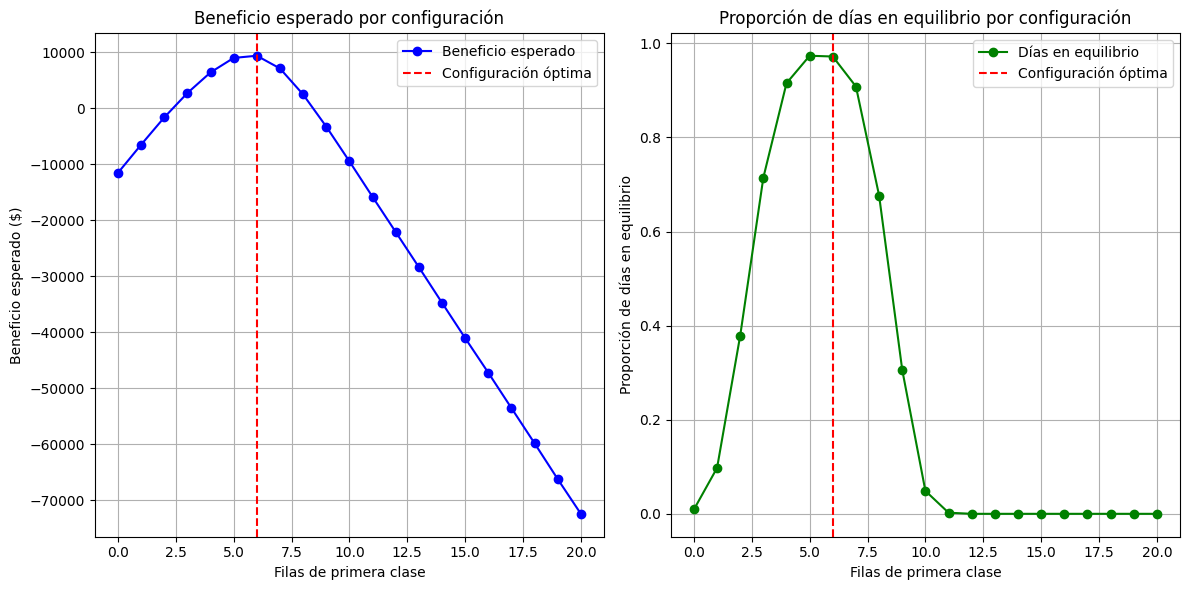

In [221]:
# Rango de filas de primera clase (de 0 a 20)
first_class_rows_range = range(0, 21)

# Lista para almacenar los beneficios esperados de cada configuración
expected_profits = []

# Lista para almacenar las proporciones de días en equilibrio
equilibrium_proportions = []

# Lista para almacenar las configuraciones (filas de primera clase, filas de turista)
configurations = []

# Evaluar cada configuración
for first_class_rows in first_class_rows_range:
    # Calcular el número de filas de turista
    tourist_rows = total_rows - 2 * first_class_rows
    
    # Evaluar la configuración
    expected_profit, equilibrium_proportion = evaluate_configuration(first_class_rows, tourist_rows)
    
    # Almacenar los resultados
    configurations.append((first_class_rows, tourist_rows))
    expected_profits.append(expected_profit)
    equilibrium_proportions.append(equilibrium_proportion)

# Encontrar el índice del máximo beneficio esperado
max_profit_index = np.argmax(expected_profits)

# Obtener la configuración, el beneficio máximo y la proporción de días en equilibrio
best_configuration = configurations[max_profit_index]
max_expected_profit = expected_profits[max_profit_index]
equilibrium_proportion_optimal = equilibrium_proportions[max_profit_index]

print(f"Configuración óptima: {best_configuration[0]} filas de primera clase y {best_configuration[1]} filas de turista")
print(f"Máximo beneficio esperado: ${max_expected_profit:.2f}")
print(f"Proporción de días en equilibrio (beneficio >= 0): {equilibrium_proportion_optimal:.2%}")


# Crear el gráfico
plt.figure(figsize=(12, 6))

# Gráfico del beneficio esperado
plt.subplot(1, 2, 1)  # Subplot 1: Beneficio esperado
plt.plot(first_class_rows_range, expected_profits, marker='o', color='b', label=f'Beneficio esperado')
plt.axvline(x=best_configuration[0], color='r', linestyle='--', label='Configuración óptima')
plt.xlabel('Filas de primera clase')
plt.ylabel('Beneficio esperado ($)')
plt.title('Beneficio esperado por configuración')
plt.legend()
plt.grid(True)

# Gráfico de la proporción de días en equilibrio
plt.subplot(1, 2, 2)  # Subplot 2: Proporción de días en equilibrio
plt.plot(first_class_rows_range, equilibrium_proportions, marker='o', color='g', label='Días en equilibrio')
plt.axvline(x=best_configuration[0], color='r', linestyle='--', label='Configuración óptima')
plt.xlabel('Filas de primera clase')
plt.ylabel('Proporción de días en equilibrio')
plt.title('Proporción de días en equilibrio por configuración')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()